# Chocolate Scraping with Beautiful Soup

### Assignment designed by Codecademy

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
request = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html').text
soup = BeautifulSoup(request, "html.parser")
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
<script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script></head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<

## How many terrible chocolate bars are out there? And how many earned a perfect 5?

#### The rating scale is from 1-5, as described in this [review guide](http://flavorsofcacao.com/review_guide.html). A 1 is “unpleasant” chocolate, while a 5 is a bar that transcends “beyond the ordinary limits”.

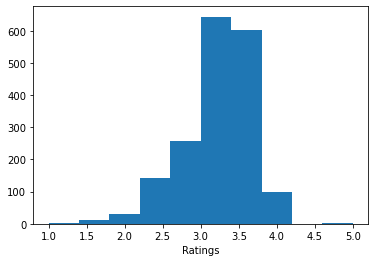

In [3]:
ratings = []
for rating in soup.find_all('td',attrs={"class":"Rating"})[1:]:
    ratings.append(float(rating.get_text()))

plt.hist(ratings)
plt.xlabel ('Ratings')
plt.show()

### Which company makes the best chocolate?

In [4]:
companies = []
for company in soup.find_all('td', attrs={'class':'Company'})[1:]:
    companies.append(company.get_text())

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


<AxesSubplot:xlabel='Company'>

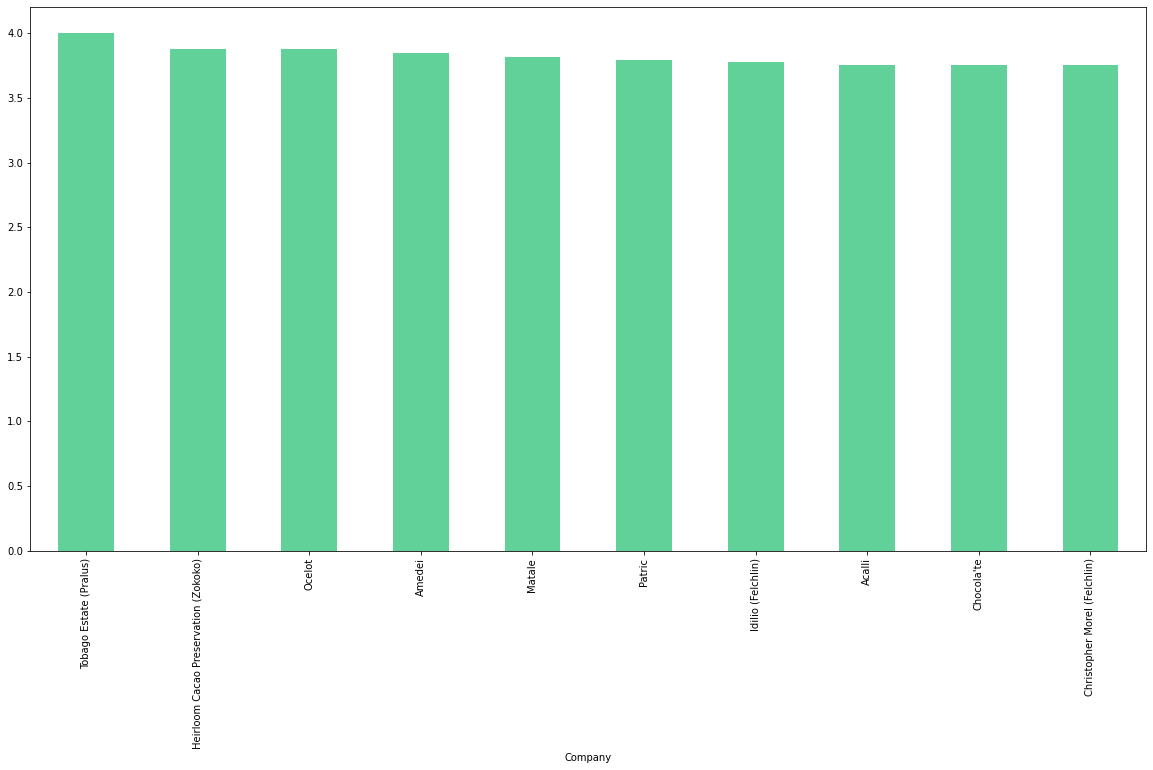

In [5]:
columns = {"Company": companies, "Rating": ratings}
df = pd.DataFrame.from_dict(columns)

# 10 most highly rated chocolatiers
mean_vals = df.groupby("Company").Rating.mean()
counts = mean_vals.nlargest(10)
print(counts)
counts.plot.bar(figsize=(20, 10), color='#61D199')

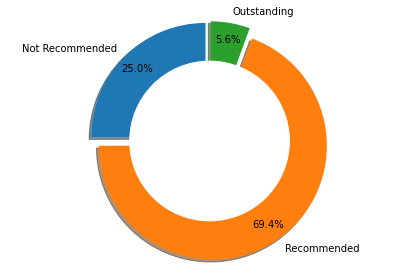

In [6]:
#Upgrade the Rating chart

not_recommended = df[df['Rating'] < 3.0] 
recommended = df[(df['Rating'] >= 3.0) & (df['Rating'] < 4.0)]  
outstanding = df[df['Rating'] >= 4.0] 

# The label names
label_names=['Not Recommended','Recommended','Outstanding']
#Using .shape[0] to find the number of rows i.e number of ratings
sizes = [not_recommended.shape[0],recommended.shape[0],outstanding.shape[0]]
# Make the donut plot
explode = (0.05,0.05,0.05)
# The pie chart
plt.pie(sizes,labels=label_names,explode=explode,autopct='%1.1f%%',pctdistance=0.85
        ,startangle=90,shadow=True)
fig=plt.gcf()
# Create a white circle inside the pie chart to make it look like a donut 
my_circle=plt.Circle((0,0),0.7,color='white')
fig.gca().add_artist(my_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Is more cacao better?

In [7]:
cocoa_pct = []
for pct in soup.find_all('td', attrs={'class':'CocoaPercent'})[1:]:
    pct = int(float(pct.get_text().strip('%')))
    cocoa_pct.append(pct)

df["CocoaPercentage"] = cocoa_pct
df

,Company,Rating,CocoaPercentage
0,A. Morin,3.75,63
1,A. Morin,2.75,70
2,A. Morin,3.00,70
3,A. Morin,3.50,70
4,A. Morin,3.50,70
...,...,...,...
1790,Zotter,3.75,70
1791,Zotter,3.00,65
1792,Zotter,3.50,65
1793,Zotter,3.25,62


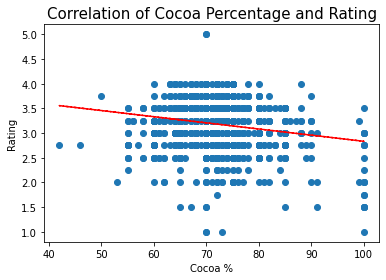

In [8]:
plt.clf()
plt.scatter(df.CocoaPercentage, df.Rating)
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.title('Correlation of Cocoa Percentage and Rating', fontsize = 15)
plt.xlabel('Cocoa %')
plt.ylabel('Rating')
plt.show()

## Where are the best cocoa beans grown? 

In [9]:
bean_origins = [origin.get_text() for origin in soup.find_all('td', attrs={'class':'Origin'})[1:]]    
company_countries = [country.get_text() for country in soup.find_all('td', attrs={'class':'CompanyLocation'})[1:]]
df["CompanyLocation"] = company_countries
df["BeanOrigin"] = bean_origins
df

,Company,Rating,CocoaPercentage,CompanyLocation,BeanOrigin
0,A. Morin,3.75,63,France,Agua Grande
1,A. Morin,2.75,70,France,Kpime
2,A. Morin,3.00,70,France,Atsane
3,A. Morin,3.50,70,France,Akata
4,A. Morin,3.50,70,France,Quilla
...,...,...,...,...,...
1790,Zotter,3.75,70,Austria,Peru
1791,Zotter,3.00,65,Austria,Congo
1792,Zotter,3.50,65,Austria,Kerala State
1793,Zotter,3.25,62,Austria,Kerala State


### Top 5 regions based of ratings

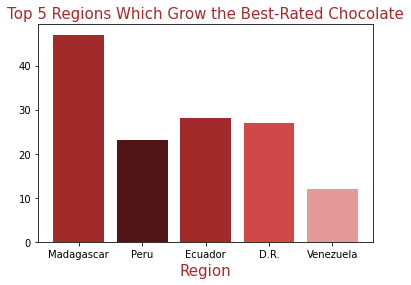

In [10]:
countries=df['BeanOrigin'].value_counts().index.tolist()[:5]
best_choc={}
for j in countries:
    c=0
    b=df[df['BeanOrigin']==j]
    br=b[b['Rating']>=3] # rating more than 3
    for i in br['Rating']:
        c+=1
        #I added this the make xlable legible
        if(j=='Dominican Republic'):
            j='D.R.'
        best_choc[j]=c  
        
li=best_choc.keys()
plt.bar(range(len(best_choc)), best_choc.values(), align='center'
        ,color=['#a22a2a','#511515','#a22a2a','#d04949','#e59a9a'])
plt.xticks(range(len(best_choc)), list(li))
plt.xlabel('Region',color='brown',size=15)
plt.title('Top 5 Regions Which Grow the Best-Rated Chocolate',fontsize=15, color = 'brown')
plt.show()

## Which countries produce the highest-rated bars?

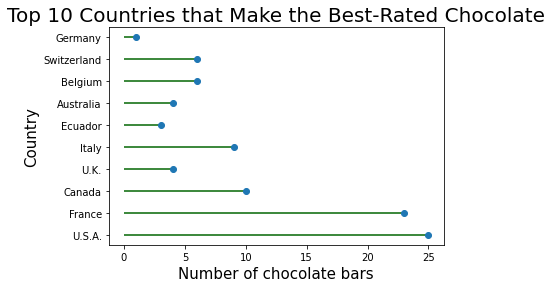

In [11]:
countries=df['CompanyLocation'].value_counts().index.tolist()[:10]
best_choc={}
for j in countries:
    c=0
    b=df[df['CompanyLocation']==j]
    br=b[b['Rating']>=4] # rating more than 4
    for i in br['Rating']:
        c+=1
        best_choc[j]=c    

li=best_choc.keys()
# The lollipop plot
plt.hlines(y=li,xmin=0,xmax=best_choc.values(),color='darkgreen')
plt.plot(best_choc.values(),li,"o")
plt.xlabel('Number of chocolate bars',size=15)
plt.ylabel('Country',size=15)
plt.title('Top 10 Countries that Make the Best-Rated Chocolate', fontsize = 20)
plt.show()